# Data Exploration

This notebook provides visualizations of the MRI scans to understand the data and trends.  



*   list sections and descriptions



# Loading packages

In [ ]:
import numpy as np # comments that describe what packages function as
from sklearn.metrics import accuracy_score
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from zipfile import ZipFile
import PIL
from PIL import Image
from numpy import asarray
import glob
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Loading and preparing data - kaggle dataset
> https://www.kaggle.com/datasets/sachinkumar413/alzheimer-mri-dataset

In [ ]:
# mounting google drive
from google.colab import drive
drive.mount('/content/drive/')

# downloads kaggle dataset and unzips zip file from drive
os.environ['KAGGLE_CONFIG_DIR'] = "/content"
# !kaggle datasets download -d sachinkumar413/alzheimer-mri-dataset
file_name = 'drive/MyDrive/Extracurriculars/InspiritAI/Deniz Yilmaz/Data/Old MRI Data/alzheimer-mri-dataset.zip' # file path instructions
with ZipFile(file_name, 'r') as zipfile:
    zipfile.extractall()

# creates label list and image list
label_dirs = glob.glob("/content/Dataset/*")
image_list = []

# puts images in image_list
for label_dir in label_dirs:
  label = label_dir.split("/")[3]
  for file in glob.glob(label_dir + "/*.jpg"):
    image = Image.open(file).resize((150,150))
    numpydata = asarray(image)
    image_item = np.array([label, file, numpydata])
    image_list.append(image_item)

# converts image_list to numpy array
image_array = np.asarray(image_list)

Mounted at /content/drive/


In [ ]:
# Normalization of image data, converts labels from strings to integers

# normalization function
def normalize_one_image(image):
  return((image - np.min(image)) / (np.max(image) - np.min(image)))

# label conversion function
def label_to_number(label):
  if label == "Very_Mild_Demented":
    return 1
  if label == "Moderate_Demented":
    return 3
  if label == "Mild_Demented":
    return 2
  if label == "Non_Demented":
    return 0

  return -1

# creates normalized_image_array and label_array
normalized_image_array = []
label_array = []

# adds normalized images to normalized_image_array and new labels to label_array
for item in image_array:
  img = item[2]
  img = normalize_one_image(img)
  img = img.flatten()
  label = label_to_number(item[0])
  normalized_image_array.append(img)
  label_array.append(label)

## Data Visualization

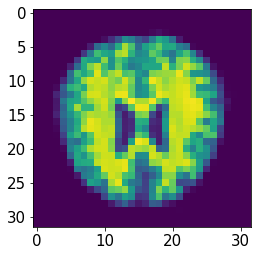

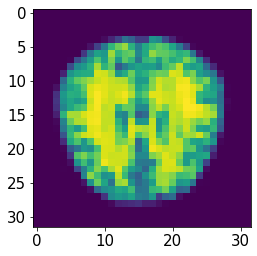

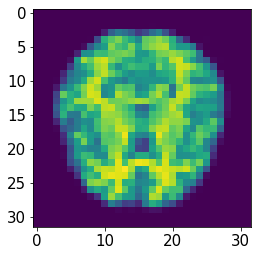

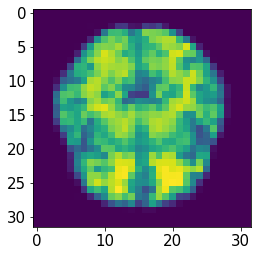

In [ ]:
# non-demented
i = 0
for index, img in enumerate(normalized_image_array):
    if label_array[index] == 0:
      img = img.reshape(150,150)
      plt.figure()
      plt.imshow(img)
      i = i + 1
      
    if i > 3:
      break

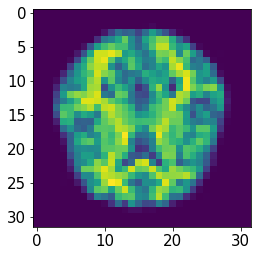

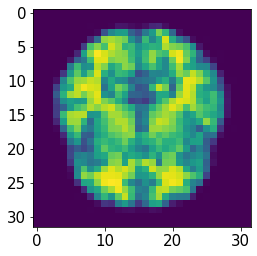

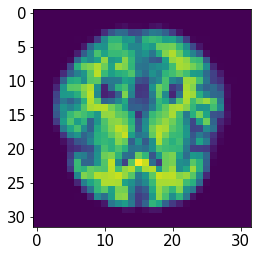

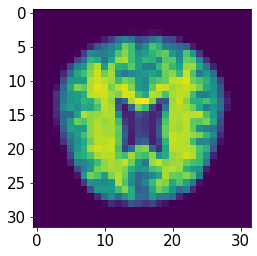

In [ ]:
# very mild demented
i = 0
for index, img in enumerate(normalized_image_array):
    if label_array[index] == 1:
      img = img.reshape(150,150)
      plt.figure()
      plt.imshow(img)
      i = i + 1
      
    if i > 3:
      break

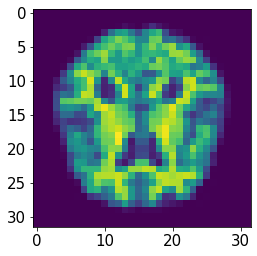

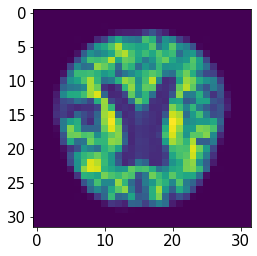

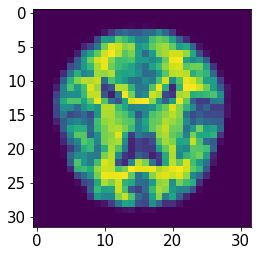

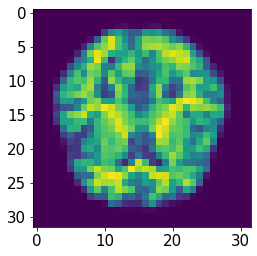

In [ ]:
# mild demented
i = 0
for index, img in enumerate(normalized_image_array):
    if label_array[index] == 2:
      img = img.reshape(150,150)
      plt.figure()
      plt.imshow(img)
      i = i + 1
      
    if i > 3:
      break

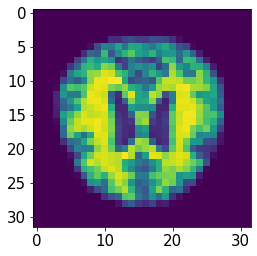

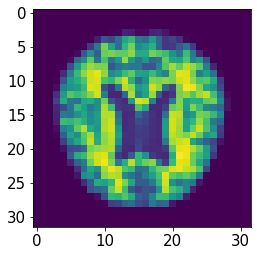

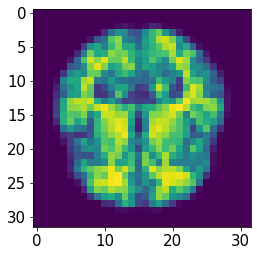

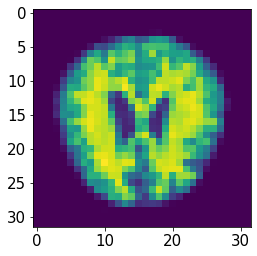

In [ ]:
# moderate demented
i = 0
for index, img in enumerate(normalized_image_array):
    if label_array[index] == 3:
      img = img.reshape(150,150)
      plt.figure()
      plt.imshow(img)
      i = i + 1
      
    if i > 3:
      break

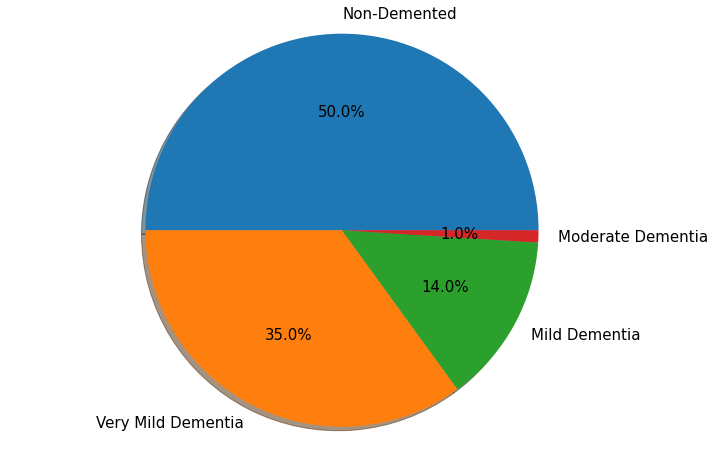

In [ ]:
# Pie chart of data split 

import matplotlib

mild_dementia = 0
very_mild_dementia = 0
non_demented = 0
moderate_dementia = 0

for label in label_array:
  if label == 0:
    non_demented += 1
  if label == 1:
    very_mild_dementia += 1
  if label == 2:
    mild_dementia += 1
  if label == 3:
    moderate_dementia += 1

matplotlib.rcParams.update({'font.size': 15})
  
class_split = [non_demented, very_mild_dementia, mild_dementia, moderate_dementia]
classes = ['Non-Demented', 'Very Mild Dementia', 'Mild Dementia', 'Moderate Dementia']

fig1, ax1 = plt.subplots(figsize = (12,8))
ax1.pie(class_split, labels=classes, autopct='%1.1f%%',
        shadow=True)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

# Loading and preparing data - oasis dataset
> https://www.oasis-brains.org/#data


In [ ]:
def label_converter(label):
  if label == 0.5:
    label = 1
  elif label == 1:
    label = 2
  elif label == 2:
    label = 3
  return label

oasis_dataset_dir = 'drive/MyDrive/Extracurriculars/InspiritAI/Deniz Yilmaz/Data/oasis_dataset'

# creates label list and image list
subject_dirs = glob.glob(oasis_dataset_dir + "/OAS1*")
oasis_normalized_image_array = []
oasis_label_array = []

oasis_df = pd.read_csv(oasis_dataset_dir + "/oasis_cross-sectional_filtered.csv")

# puts stuff in image_list
for subject_dir in subject_dirs:
  # print(subject_dir)
  subject_id = subject_dir.split("/")[7]
  # print(subject_id)
  label = oasis_df.loc[oasis_df['ID'] == subject_id]['CDR'].item()
  # print(label)
  label = label_converter(label)
  for file in glob.glob(subject_dir + "/PROCESSED/MPRAGE/T88_111/*masked_gfc_tra_90.gif"):
    image = Image.open(file).resize((150,150))
    image = image.rotate(180)
    image = image.convert('L') # convert RGB to gray
    image = asarray(image)
    image = normalize_one_image(image)
    image = image.flatten()
    # image = black_and_white(image)
    oasis_normalized_image_array.append(image)
    oasis_label_array.append(label) 

# creating binary labels
oasis_label_binary = oasis_label_array.copy()

for idx in range(len(oasis_label_binary)):
  if oasis_label_binary[idx] == 3 or oasis_label_binary[idx] == 2:
    oasis_label_binary[idx] = 1


## Data Visualization

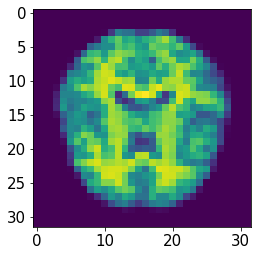

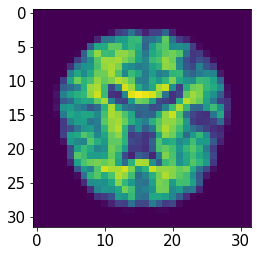

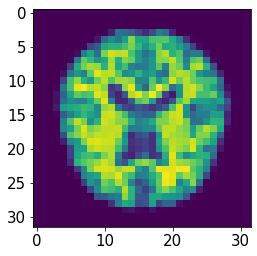

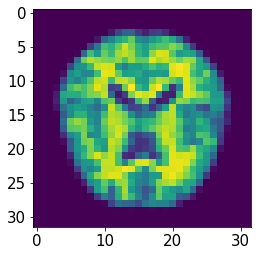

In [ ]:
# non-demented
i = 0
for index, img in enumerate(oasis_normalized_image_array):
    if oasis_label_array[index] == 0:
      img = img.reshape(150,150)
      plt.figure()
      plt.imshow(img)
      i = i + 1
      
    if i > 3:
      break

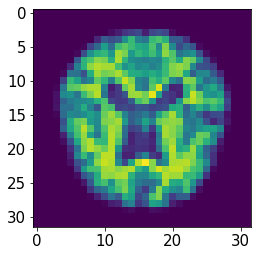

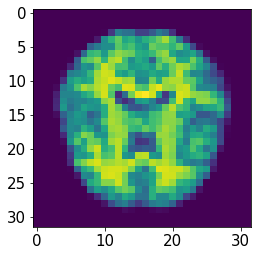

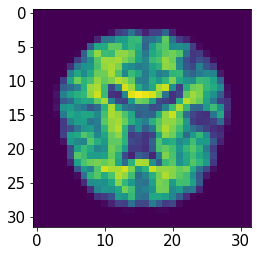

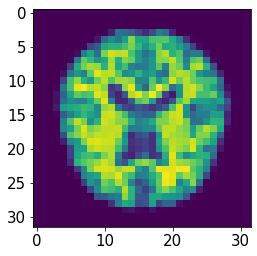

In [ ]:
# very mild demented
i = 0
for index, img in enumerate(oasis_normalized_image_array):
    if label_array[index] == 1:
      img = img.reshape(150,150)
      plt.figure()
      plt.imshow(img)
      i = i + 1
      
    if i > 3:
      break

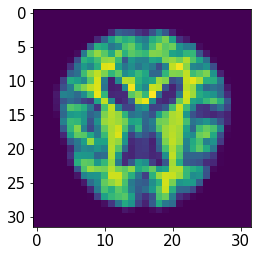

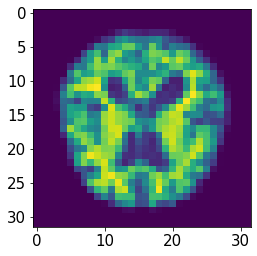

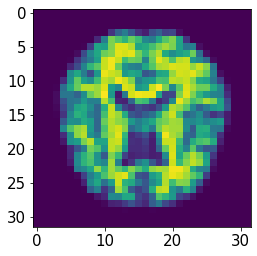

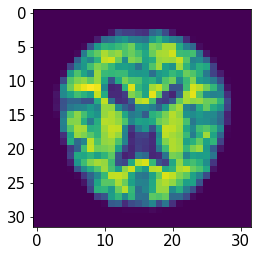

In [ ]:
# mild demented
i = 0
for index, img in enumerate(oasis_normalized_image_array):
    if oasis_label_array[index] == 2:
      img = img.reshape(150,150)
      plt.figure()
      plt.imshow(img)
      i = i + 1
      
    if i > 3:
      break

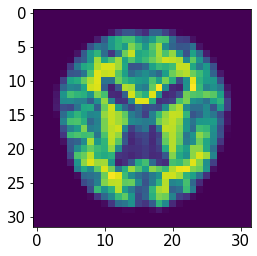

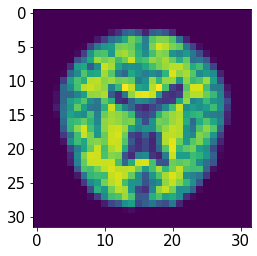

In [ ]:
# moderate demented
i = 0
for index, img in enumerate(oasis_normalized_image_array):
    if oasis_label_array[index] == 3:
      img = img.reshape(150,150)
      plt.figure()
      plt.imshow(img)
      i = i + 1
      
    if i > 3:
      break

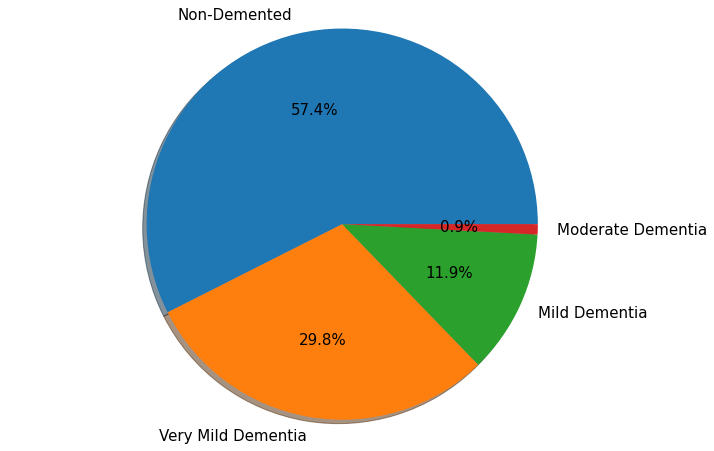

In [ ]:
import matplotlib

mild_dementia = 0
very_mild_dementia = 0
non_demented = 0
moderate_dementia = 0

for label in oasis_label_array:
  if label == 0:
    non_demented += 1
  if label == 1:
    very_mild_dementia += 1
  if label == 2:
    mild_dementia += 1
  if label == 3:
    moderate_dementia += 1

matplotlib.rcParams.update({'font.size': 15})
  
class_split = [non_demented, very_mild_dementia, mild_dementia, moderate_dementia]
classes = ['Non-Demented', 'Very Mild Dementia', 'Mild Dementia', 'Moderate Dementia']

fig1, ax1 = plt.subplots(figsize = (12,8))
ax1.pie(class_split, labels=classes, autopct='%1.1f%%',
        shadow=True)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.


plt.show()